## Observations and Insights

## Dependencies and starter code

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Import data from CSV files
mouse_data = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read imported data to dataframes
mouse_df = pd.read_csv(mouse_data)
study_df = pd.read_csv(study_results)

# Combine the data into a single dataset
full_mouse_data = pd.merge(mouse_df, study_df, on=['Mouse ID','Mouse ID'])
full_mouse_data.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Making groupby object on Drug Regimen
regimen_group = full_mouse_data.groupby(['Drug Regimen'], sort=False)

# Set up summary table starting with mean
reg_summary = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].mean())
reg_summary.rename(columns={'Tumor Volume (mm3)':'Mean'}, inplace=True)

# Define median, variance, standard deviation, and Sem tables
reg_median = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].median())
reg_var = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].var())
reg_std = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].std())
reg_sem = pd.DataFrame(regimen_group['Tumor Volume (mm3)'].sem())

# Merging each stat into the table and renaming the columns
reg_summary = reg_summary.merge(reg_median, on='Drug Regimen', how='outer')
reg_summary.rename(columns={'Tumor Volume (mm3)':'Median'}, inplace=True)
reg_summary = reg_summary.merge(reg_var, on='Drug Regimen', how='outer')
reg_summary.rename(columns={'Tumor Volume (mm3)':'Variance'}, inplace=True)
reg_summary = reg_summary.merge(reg_std, on='Drug Regimen', how='outer')
reg_summary.rename(columns={'Tumor Volume (mm3)':'Standard Deviation'}, inplace=True)
reg_summary = reg_summary.merge(reg_sem, on='Drug Regimen', how='outer')
reg_summary.rename(columns={'Tumor Volume (mm3)':'SEM'}, inplace=True)
reg_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884


## Bar plots

Text(0.5, 0, 'Drug Regimens')

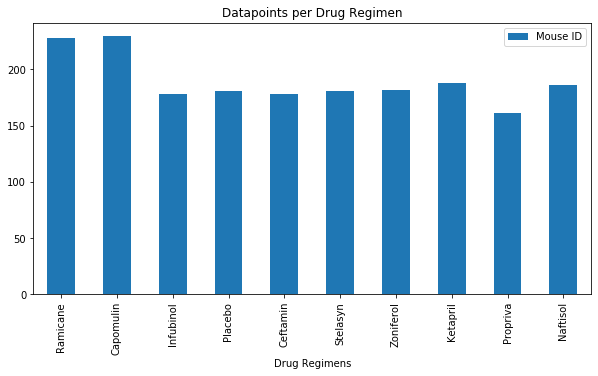

In [93]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
id_count = pd.DataFrame(regimen_group['Mouse ID'].count())
id_count.plot(kind='bar', figsize=(10,5))
plt.title('Datapoints per Drug Regimen')
plt.xlabel('Drug Regimens')

<function matplotlib.pyplot.show(*args, **kw)>

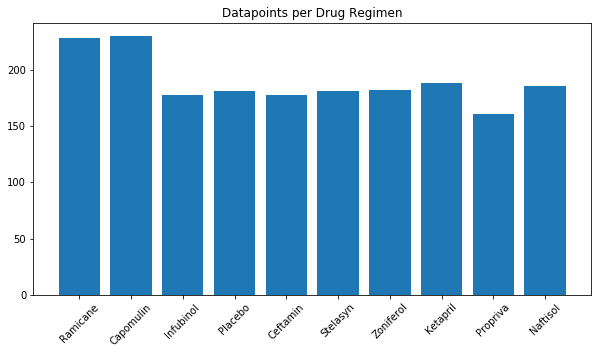

In [89]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regimens = full_mouse_data['Drug Regimen'].unique()
reg_count = regimen_group['Tumor Volume (mm3)'].count()

plt.figure(figsize=(10,5))
plt.bar(drug_regimens, reg_count)
plt.title('Datapoints per Drug Regimen')
plt.xlabel('Dreug Regimens')
plt.xticks(rotation=45)
plt.show

## Pie plots

Text(0.5, 1.0, 'Male to Female ratio')

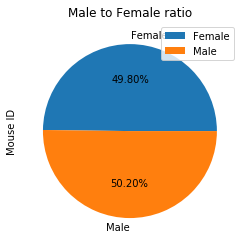

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
only_once = full_mouse_data.drop_duplicates('Mouse ID')
individual_group = only_once.groupby(['Sex'])
mf = individual_group.count()

mf.plot.pie(y='Mouse ID', autopct='%.2f%%')
plt.title('Male to Female ratio')

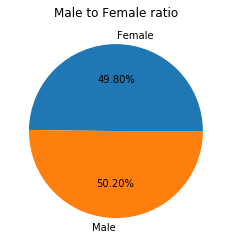

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mf['Mouse ID'], labels=mf.index,autopct='%.2f%%')
plt.title('Male to Female ratio')
plt.show()

## Quartiles, outliers and boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# Dataframe for top four keeping only last timepoints
top = full_mouse_data.loc[(full_mouse_data['Drug Regimen']=='Capomulin')|(full_mouse_data['Drug Regimen']=='Ramicane')|(full_mouse_data['Drug Regimen']=='Infubinol')|(full_mouse_data['Drug Regimen']=='Ceftamin'), :]
top_finals = top.drop_duplicates('Mouse ID', keep='last')

# Defining dataframes for each drug
cap_finals = top_finals.loc[top_finals['Drug Regimen']=='Capomulin', :]
ram_finals = top_finals.loc[top_finals['Drug Regimen']=='Ramicane', :]
inf_finals = top_finals.loc[top_finals['Drug Regimen']=='Infubinol', :]
cef_finals = top_finals.loc[top_finals['Drug Regimen']=='Ceftamin', :]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Defining quartiles, iqr, and bounds for each drug
cap_lq = cap_finals['Tumor Volume (mm3)'].quantile(.25)
cap_uq = cap_finals['Tumor Volume (mm3)'].quantile(.75)
cap_iqr = cap_uq-cap_lq
cap_lb = cap_lq - (1.5 * cap_iqr)
cap_ub = cap_uq + (1.5 * cap_iqr)

ram_lq = ram_finals['Tumor Volume (mm3)'].quantile(.25)
ram_uq = ram_finals['Tumor Volume (mm3)'].quantile(.75)
ram_iqr = ram_uq-ram_lq
ram_lb = ram_lq - (1.5 * ram_iqr)
ram_ub = ram_uq + (1.5 * ram_iqr)

inf_lq = inf_finals['Tumor Volume (mm3)'].quantile(.25)
inf_uq = inf_finals['Tumor Volume (mm3)'].quantile(.75)
inf_iqr = inf_uq-inf_lq
inf_lb = inf_lq - (1.5 * inf_iqr)
inf_ub = inf_uq + (1.5 * inf_iqr)

cef_lq = cef_finals['Tumor Volume (mm3)'].quantile(.25)
cef_uq = cef_finals['Tumor Volume (mm3)'].quantile(.75)
cef_iqr = cef_uq-cef_lq
cef_lb = cef_lq - (1.5 * cef_iqr)
cef_ub = cef_uq + (1.5 * cef_iqr)

# Printing IQRs
print(f'''IQRs are as follows
Capomulin: {cap_iqr}
Ramicane: {ram_iqr}
Infubinol: {inf_iqr}
Ceftamin: {cef_iqr}
''')

# Determining and printing outliers
cap_out = cap_finals.loc[(cap_finals['Tumor Volume (mm3)'] > cap_ub)|(cap_finals['Tumor Volume (mm3)'] < cap_lb), :]
ram_out = ram_finals.loc[(ram_finals['Tumor Volume (mm3)'] > ram_ub)|(ram_finals['Tumor Volume (mm3)'] < ram_lb), :]
inf_out = inf_finals.loc[(inf_finals['Tumor Volume (mm3)'] > inf_ub)|(inf_finals['Tumor Volume (mm3)'] < inf_lb), :]
cef_out = cef_finals.loc[(cef_finals['Tumor Volume (mm3)'] > cef_ub)|(cef_finals['Tumor Volume (mm3)'] < cef_lb), :]
outliers = inf_out['Mouse ID'].tolist()
print(f"Ouliers are: {outliers}")

IQRs are as follows
Capomulin: 7.781863460000004
Ramicane: 9.098536719999998
Infubinol: 11.477135160000003
Ceftamin: 15.577752179999997

Ouliers are: ['c326']


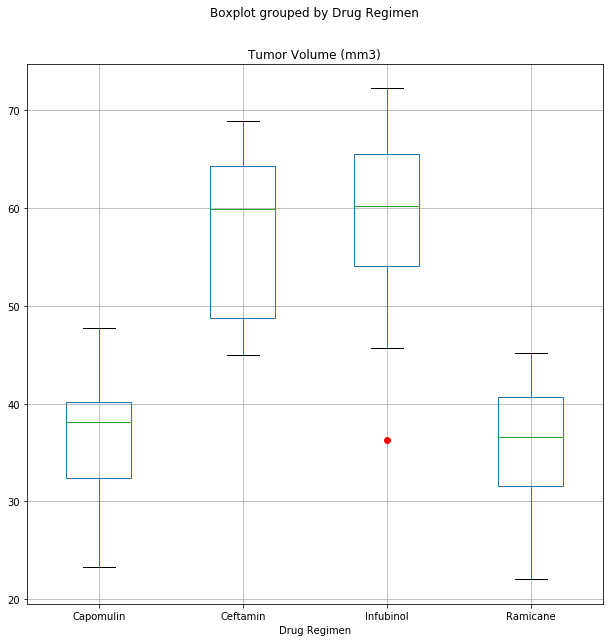

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
top_finals.boxplot(by='Drug Regimen', column='Tumor Volume (mm3)', sym='r',figsize=(10,10))

## Line and scatter plots

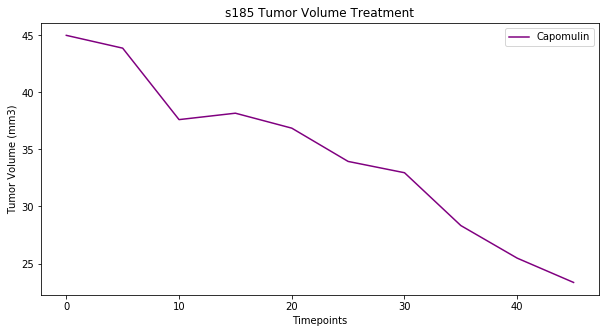

In [95]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = full_mouse_data.loc[full_mouse_data['Drug Regimen']=='Capomulin', :]
s185 = capomulin.loc[capomulin['Mouse ID']=='s185', :]
s185

plt.figure(figsize=(10,5))
xaxis = s185['Timepoint']
yaxis = s185['Tumor Volume (mm3)']
plt.plot(xaxis, yaxis, color='purple', label='Capomulin')
plt.title('s185 Tumor Volume Treatment')
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()

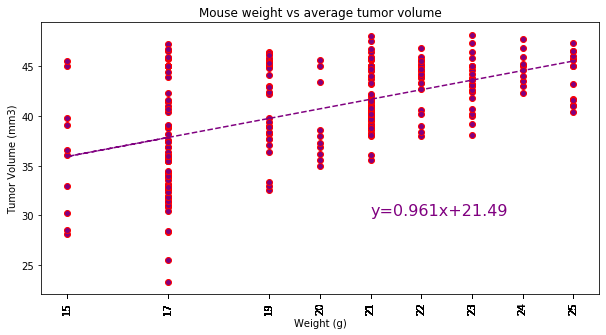

Correlation is 0.526


In [96]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Set x and x axis
scatter_x = capomulin['Weight (g)']
scatter_y = capomulin['Tumor Volume (mm3)']

# Plot scatter
plt.figure(figsize=(10,5))
plt.scatter(scatter_x, scatter_y, facecolors='purple', edgecolors='red')
plt.title('Mouse weight vs average tumor volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
c_slope, c_int, c_r, c_p, c_std_err = st.linregress(scatter_x, scatter_y)
c_fit = c_slope * scatter_x + c_int
regress_line = f"y={round(c_slope, 3)}x+{round(c_int, 3)}"

plt.plot(scatter_x,c_fit,"--", color='purple')
plt.xticks(scatter_x, rotation=90)
plt.annotate(regress_line, xy=(21, 30), fontsize=16, color='purple')
plt.show()

corr = st.pearsonr(scatter_x, scatter_y)
print(f"Correlation is {round(corr[0], 3)}")